# Introduction

We need to generate plots using the up to date coverage algorithm on the 920 cell paper final set.

In [1]:
import os
import sys
from matplotlib import pyplot
from woldrnaseq import models
from woldrnaseq import plot_coverage

from c1extra import read_remote_sheet, get_cluster_maps, ODFReader

In [2]:
book = ODFReader('C1_single_cells_library_number_cell_type_annotation_Jan13_2019.ods')
clusters = book.parse('Sheet1')
clusters = clusters[['cell_ID', 'cell type cluster 920']]
clusters.shape

(920, 2)

In [3]:
coverage_source='single-cell-single-model-min-1000-max-1-all'

In [4]:
libraries = models.load_library_tables([os.path.join(coverage_source, 'library.tsv')])
experiments = models.load_experiments([os.path.join(coverage_source, 'cluster-experiment-merged-mesenchyme.tsv')])

In [5]:
coverage = models.load_all_coverage(libraries)

No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18042_A10 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18045_D3 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18045_D9 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18046_E4 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18046_E5 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18046_E11 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18046_E12 for *.coverage
No files f

No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18255_E9 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18256_F10 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18256_F12 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18257_G1 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18257_G9 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18257_G10 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/18258_A4 for *.coverage
No files f

No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/20046_C7 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/20046_C8 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/20047_D7 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/20047_D8 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/20048_E7 for *.coverage
No files found in /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_combined/single-cell-single-model-min-1000-max-1-all/20048_E8 for *.coverage


In [6]:
set(coverage.columns).difference(clusters['cell_ID'])

set()

In [7]:
sheet = read_remote_sheet(
    "https://woldlab.caltech.edu/nextcloud/index.php/s/XNJQRJbWeXDyf78/download", 
    'coverage_cluster')
#cluster_label, cluster_color, cluster_order
cluster_maps = get_cluster_maps(sheet, 'coverage_class', 'label')
cluster_label = cluster_maps['label']
cluster_color = cluster_maps['color']
cluster_order = cluster_maps['order']


In [8]:
cluster_label

{'Muscle_3_only_protein': 'mus3',
 'Muscle_2_only_protein': 'mus2',
 'Muscle_1_only_protein': 'mus1',
 'Mesenchyme_only_protein': 'mes',
 'Chondrocyte_only_protein': 'chon',
 'EMP': 'EMP',
 'Macrophage_only_protein': 'mac',
 'Endothelial_only_protein': 'endo',
 'Perichondrium_only_protein': 'pchon',
 'Epithelial_only_protein': 'ecto',
 'Neural_Crest_only_protein': 'neur'}

In [9]:
def make_coverage_plot(experiment, coverage):
    with pyplot.style.context('seaborn-dark-palette'):
        f = pyplot.figure(dpi=100)
        ax = f.add_subplot(1, 1, 1)
        coverage.plot(ax=ax)
        ax.set_title('Coverage for {}'.format(experiment))
        ax.set_xlabel("position quantile (5' to 3')")
        ax.set_ylabel('Read depth')
        ylim_bottom, ylim_top = ax.get_ylim()
        ax.set_ylim(0, ylim_top)
        ax.legend(bbox_to_anchor=(1.05, 1),
                  loc=2,
                  borderaxespad=0.0)
    return f

def make_median_normalized_summary(ax, experiment, library_ids, coverage, fillcolors=None, bare=False):
    with pyplot.style.context('seaborn-dark-palette'):
        centered = coverage[library_ids] / coverage[library_ids].median(axis=0)

        fillcolor = fillcolors[experiment] if fillcolors is not None else 'blue'
        if fillcolor in ('black', '#000000'):
            linecolor='#e0e0e0'
        else:
            linecolor='black'
        median = centered.median(axis=1)
        stdev = centered.std(axis=1)
        s = ax.plot(median, color=linecolor, linewidth=2)
        ax.text(50, 0.25, s=experiment,
                horizontalalignment='center',
        )
        
        ax.fill_between(
            x=median.index,
            y1=median-stdev,
            y2=median+stdev,
            label='+/- std. dev',
            facecolor=fillcolor,
            edgecolor='black',
            alpha=0.75
            )


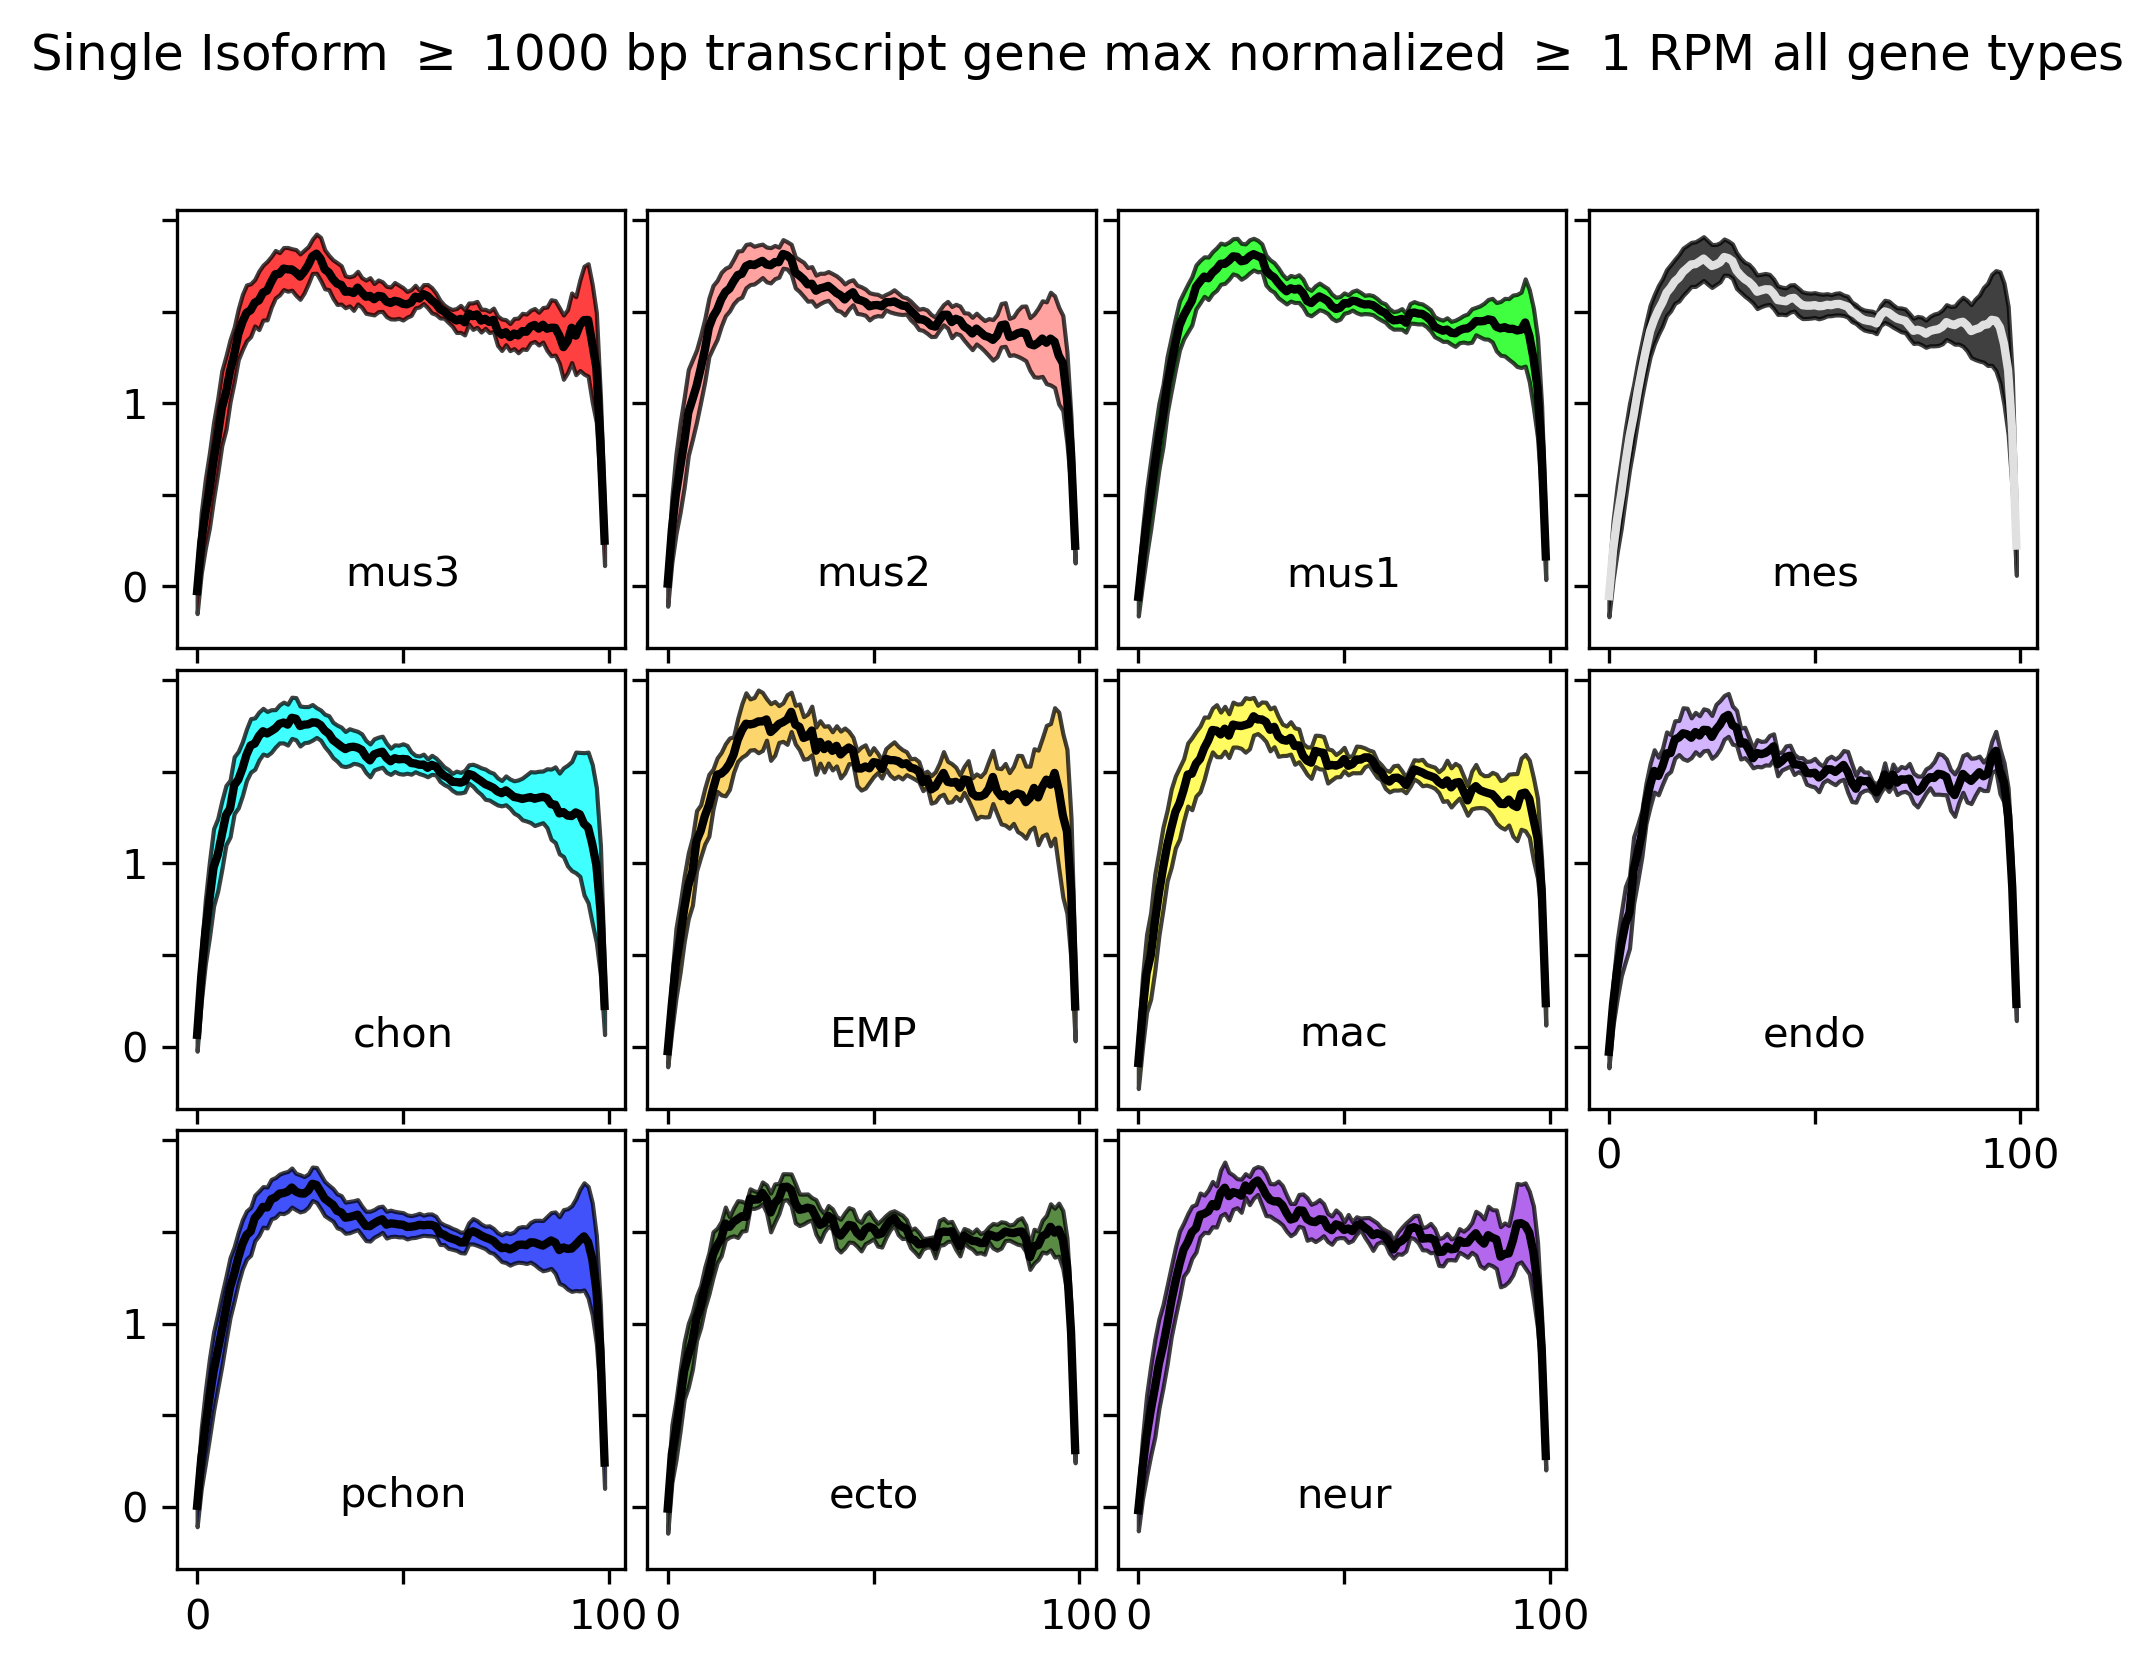

In [10]:
f = pyplot.figure(dpi=300, figsize=(8,6))
f.suptitle('Single Isoform $\geq$ 1000 bp transcript gene max normalized $\geq$ 1 RPM all gene types')
axes = [None] * 11
for i in [8,4,0,9,10,7,1,2,3,5,6]:
    name = experiments.index[i]
    library_ids = experiments.loc[name]['replicates']
    label = cluster_label[name]
    sharex = {
        0: axes[8],
        1: axes[8],
        2: axes[8],
        3: axes[8],
        4: axes[8],
        5: axes[8],
        6: axes[8],
        7: axes[8], 
        8: None,
        9: axes[8],
        10: axes[8],
    }[i]
    sharey = {
        0: axes[8],
        1: axes[8],
        2: axes[8],
        3: axes[8],
        4: axes[8],
        5: axes[8],
        6: axes[8],
        7: axes[8],
        8: None,
        9: axes[8],
        10: axes[8],
    }[i]
    
    ax = f.add_subplot(3, 4, i+1, sharex=sharex, sharey=sharey)
    axes[i] = ax
    make_median_normalized_summary(ax, label, library_ids, coverage, cluster_color)
    if i == 8:
        labels = []
        for t in ax.get_xticks():
            if t == 0.0:
                labels.append('0')
            elif t == 100.0:
                labels.append('100')
            else:
                labels.append('')
        ax.set_xticklabels(labels)
        
        labels = ['']
        for t in ax.get_yticks():
            if t == 0.0:
                labels.append('0')
            elif t == 1.0:
                labels.append('1')
            else:
                labels.append('')
        ax.set_yticklabels(labels)
            
    if i not in (8, 4, 0):
        [l.set_visible(False) for l in ax.yaxis.get_ticklabels()]
    if i not in (7,8,9,10):
        [l.set_visible(False) for l in ax.xaxis.get_ticklabels()]

#f.tight_layout(pad=0)    
f.subplots_adjust(wspace=.05, hspace=.05)

In [11]:
f.savefig('c1-coverage-grid-max-1-all-types.png')
f.savefig('c1-coverage-grid-max-1-all-types.eps')
f.savefig('c1-coverage-grid-max-1-all-types.svg')

In [12]:
cluster_order

array(['mus3', 'mus2', 'mus1', 'mes', 'chon', 'EMP', 'mac', 'endo',
       'pchon', 'ecto', 'neur'], dtype=object)

In [13]:
ax.xaxis.get_ticklines()

<a list of 10 Line2D ticklines objects>

In [14]:
experiments.index

Index(['Muscle_3_only_protein', 'Muscle_2_only_protein',
       'Muscle_1_only_protein', 'Mesenchyme_only_protein',
       'Chondrocyte_only_protein', 'EMP', 'Macrophage_only_protein',
       'Endothelial_only_protein', 'Perichondrium_only_protein',
       'Epithelial_only_protein', 'Neural_Crest_only_protein'],
      dtype='object', name='experiment')

In [ ]:
f.suptitle?